In [91]:
import numpy as np
import matplotlib.pyplot as plt

datain = np.loadtxt('../data/Day9.txt',dtype=str)
data = np.array([list(d) for d in datain]).astype(int)

# Part 1

In [102]:
def find_mins(data):
    # for center
    gradup = np.roll(data,1,axis=0) - data
    graddown = np.roll(data,-1,axis=0) - data
    gradleft = np.roll(data,1,axis=1) - data
    gradright = np.roll(data,-1,axis=1) - data
    mins = (gradup > 0) & (graddown > 0) & (gradleft > 0) & (gradright > 0)
    
    # for edges
    mintop = (graddown > 0) & (gradleft > 0) & (gradright > 0)
    minleft = (gradup > 0) & (graddown > 0) & (gradright > 0)
    minright = (gradup > 0) & (graddown > 0) & (gradleft > 0)
    minbot = (gradup > 0) & (gradleft > 0) & (gradright > 0)
    
    mins[0] = mintop[0]
    mins[:,0] = minleft[:,0]
    mins[:,-1] = minright[:,-1]
    mins[-1] = minbot[-1]
    
    # for corners
    mintl = (graddown > 0) & (gradright > 0)
    mintr = (graddown > 0) & (gradleft > 0)
    minbl = (gradup > 0) & (gradright > 0)
    minbr = (gradup > 0) & (gradleft > 0)
    
    mins[0,0] = mintl[0,0]
    mins[0,-1] = mintr[0,-1]
    mins[-1,0] = minbl[-1,0]
    mins[-1,-1] = minbr[-1,-1]
    
    return mins

In [103]:
mins_mask = find_mins(data)
mins = np.array(np.where(mins_mask == True)).T

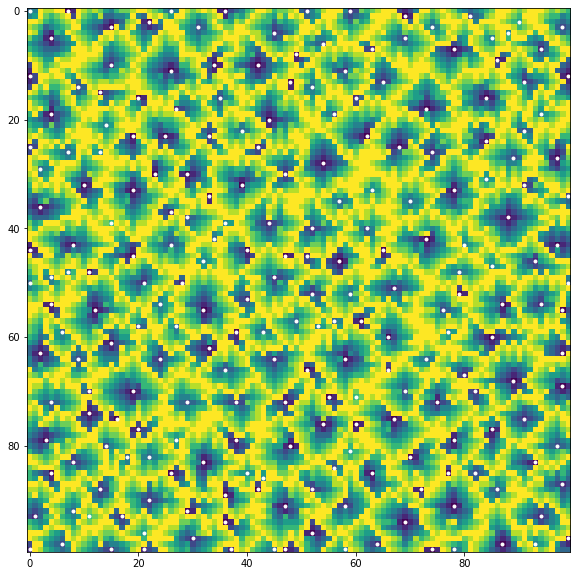

In [104]:
fig = plt.figure(figsize=(10,10))
plt.imshow(data)
plt.plot(mins[:,1],mins[:,0],'w.')
plt.show()

In [105]:
minvals = np.array([data[tuple(m)] for m in mins])
print(np.sum(minvals+1))

528


# Part 2

In [153]:
from skimage.measure import label, regionprops
label_data = label(data<9,neighbors=4)

In [152]:
?label

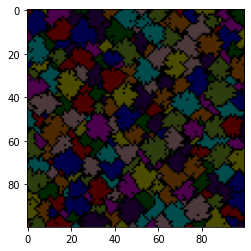

In [154]:
from skimage.color import label2rgb

image_label_overlay = label2rgb(label_data, image=data, bg_label=0)
plt.imshow(image_label_overlay)
plt.show()

In [160]:
regionarr = np.array([r.area for r in regionprops(label_data)])
len(regionarr) == len(mins)
print(np.product(sorted(regionarr)[::-1][:3]))

920448
